In [1]:
from astropy.table import Table,Column
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import numpy as np
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [57]:
cat = Table.read('/Users/lejay/phosphorus_catalogs/p_cats_v211221/COSMOS-HSCpipe-Phosphoros_updated_211221.fits')
cat = cat['RA','DEC','FLUX_APER_3_HSC-I','FLUX_CMODEL_HSC-I','Z_HIGH68','Z_LOW68','ZPHOT','Z_PEAK']

Text(0, 0.5, '$f_{i}$')

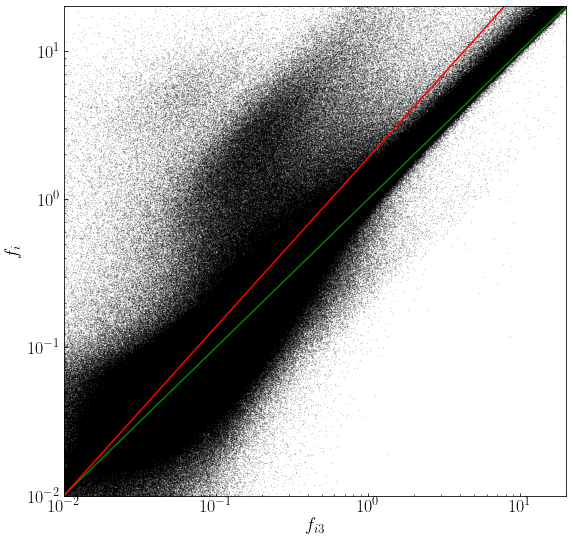

In [67]:
fig, axs = plt.subplots(1, 1, figsize = (9, 9))
plt.scatter(cat['FLUX_APER_3_HSC-I'],cat['FLUX_CMODEL_HSC-I'],s=0.05,alpha=0.3,color='k')
plt.xlim([0.01,20])
plt.ylim([0.01,20])
plt.xscale('log')
plt.yscale('log')
plt.plot([0.01,200],[0.01,200],color='g')
plt.plot([0.01,200],[0.01,800],color='r')
plt.xlabel('$f_{i3}$',fontsize=19)
plt.ylabel('$f_{i}$',fontsize=19)

##### write auto-aper3 mag offset column to pcat

In [31]:
from __future__ import print_function
import astropy.units as units
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDQuery

In [40]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'
graham_output_dir = dev_path + 'graham_output_cats/'

In [68]:
sfd = SFDQuery()

for cat_name in ['COSMOS_deep','DEEP_deep','ELAIS_deep','XMM-LSS_deep']:
    cat = Table.read('/Users/lejay/phosphorus_catalogs/p_cats_v211221/'+cat_name.replace('_deep','')+'-HSCpipe-Phosphoros_updated_211221.fits')
    cat = cat['ID','RA','DEC','FLAG_FIELD_BINARY','isOutsideMask','isStar','FLUX_CMODEL_HSC-I','FLUX_APER_3_HSC-I']
    inside_hsc_col = Column(name='inside_hsc',data=cat['FLAG_FIELD_BINARY'][:,0])
    inside_u_col = Column(name='inside_u',data=cat['FLAG_FIELD_BINARY'][:,1])
    inside_us_col = Column(name='inside_uS',data=cat['FLAG_FIELD_BINARY'][:,2])
    cat.add_columns([inside_hsc_col,inside_u_col,inside_us_col])
    
    cat = cat[cat['isOutsideMask'] == 1]  # unmasked
    cat = cat[cat['isStar'] == False]  # galaxies

    if 'XMM' not in cat_name:
        cat = cat[cat['inside_u'] == True]
    else:
        cat = cat[cat['inside_uS'] == True]
    # cat = cat[cat['inside_hsc'] == True]
    
    i_mag = 2.5 * (23 - np.log10(cat['FLUX_CMODEL_HSC-I']/1e6)) - 48.6
    i_mag[np.isnan(i_mag)]=-99.0
    i_mag[np.isinf(i_mag)]=-99.0
    
    coords = SkyCoord(cat['RA']*units.deg,  cat['DEC']*units.deg)
    ebv = sfd(coords)
    corr  = 1.6412*ebv
    i_mag = i_mag - corr
    
    cat = cat[(i_mag > -99) & (i_mag<99)]
    i_mag =i_mag[(i_mag > -99) & (i_mag<99)]
    cat = cat[i_mag < 26]
    print(len(cat))
    
    # a flux ratio cut
    flux_auto = cat['FLUX_CMODEL_HSC-I']
    flux_aper = cat['FLUX_APER_3_HSC-I']
    
     # a new column
    mag_diff = 2.5*np.log10(flux_auto/flux_aper) 
    col_magdiff = Column(name='mag_diff_auto_aper3',data=mag_diff)
    del cat
    
    if cat_name != 'XMM-LSS_deep':
        cat_sed_fitted_name = graham_output_dir+'pcat_'+cat_name+'_cat_out_nomaglimit_nonir_il_nz_prior_formass_sfq_added.fits'
    else:
        cat_sed_fitted_name = graham_output_dir+'pcat_'+cat_name+'_cat_out_nomaglimit_noirac_il_nz_prior_formass_sfq_added.fits'
    cat_sed_fitted = Table.read(cat_sed_fitted_name)
    
    print(len(cat_sed_fitted))
    if 'mag_diff_auto_aper3' not in cat_sed_fitted.keys():
        cat_sed_fitted.add_column(col_magdiff)
        print(cat_sed_fitted.keys())
        cat_sed_fitted.write(cat_sed_fitted_name, overwrite=True)
    

/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


1537705


/Users/lejay/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in log10


1537705
['ID', 'RA', 'DEC', 'tract', 'FLAG_FIELD_BINARY', 'patch', 'ZPHOT_G', 'ZPHOT_G_6B', 'ZPHOT_G_NIR', 'isCompact', 'u', 'u_err', 'snr_u', 'uS', 'uS_err', 'snr_uS', 'g', 'g_err', 'snr_g', 'r', 'r_err', 'snr_r', 'i', 'i_err', 'snr_i', 'z', 'z_err', 'snr_z', 'y', 'y_err', 'snr_y', 'Yv', 'Yv_err', 'snr_Yv', 'J', 'J_err', 'snr_J', 'H', 'H_err', 'snr_H', 'Ks', 'Ks_err', 'snr_Ks', 'FUV', 'FUV_err', 'snr_FUV', 'NUV', 'NUV_err', 'snr_NUV', 'MAG_AUTO_CH1', 'MAGERR_AUTO_CH1', 'Separation_1', 'MAG_AUTO_CH2', 'MAGERR_AUTO_CH2', 'Separation_1a', 'ALPHA_J2000', 'DELTA_J2000', 'HSC_i_MAG', 'HSC_i_MAGERR', 'IRAC_CH1_MAG', 'IRAC_CH1_MAGERR', 'IRAC_CH2_MAG', 'IRAC_CH2_MAGERR', 'lp_zPDF', 'lp_mass_med', 'ez_z500', 'ez_mass_p500', 'lp_type', 'FLAG_COMBINED', 'Separation', 'MAG_AUTO_CH1_CORR', 'MAG_AUTO_CH2_CORR', 'MAGERR_AUTO_CH1_CALI', 'MAGERR_AUTO_CH2_CALI', 'MAGERR_AUTO_CH1_CORR', 'MAGERR_AUTO_CH2_CORR', 'Z_BEST', 'Z_BEST68_LOW', 'Z_BEST68_HIGH', 'ZSPEC', 'Z_ML', 'Z_ML68_LOW', 'Z_ML68_HIGH', 'Z_COM

1272437
1272437
['ID', 'RA', 'DEC', 'tract', 'patch', 'ZPHOT_G', 'isCompact', 'u', 'u_err', 'snr_u', 'uS', 'uS_err', 'snr_uS', 'g', 'g_err', 'snr_g', 'r', 'r_err', 'snr_r', 'i', 'i_err', 'snr_i', 'z', 'z_err', 'snr_z', 'y', 'y_err', 'snr_y', 'FUV', 'FUV_err', 'snr_FUV', 'NUV', 'NUV_err', 'snr_NUV', 'MAG_AUTO_CH1', 'MAGERR_AUTO_CH1', 'MAG_AUTO_CH2', 'MAGERR_AUTO_CH2', 'MAG_AUTO_CH1_CORR', 'MAG_AUTO_CH2_CORR', 'MAGERR_AUTO_CH1_CALI', 'MAGERR_AUTO_CH2_CALI', 'MAGERR_AUTO_CH1_CORR', 'MAGERR_AUTO_CH2_CORR', 'Z_BEST', 'Z_BEST68_LOW', 'Z_BEST68_HIGH', 'ZSPEC', 'Z_ML', 'Z_ML68_LOW', 'Z_ML68_HIGH', 'Z_COMBINE', 'MASS_MED_massrun', 'MASS_INF_massrun', 'MASS_BEST_massrun', 'MASS_SUP_massrun', 'MAG_ABS_NUV', 'MAG_ABS_u', 'MAG_ABS_uS', 'MAG_ABS_g', 'MAG_ABS_r', 'MAG_ABS_i', 'MAG_ABS_z', 'MAG_ABS_y', 'MAG_ABS_J', 'MAG_ABS_Ks', 'SSFR_MED', 'SFR_MED', 'sfq_nuvrk_myrun_free', 'FLUX_CMODEL_HSC-I']
1258066
1258066
['ID', 'RA', 'DEC', 'tract', 'patch', 'ZPHOT_G', 'isCompact', 'u', 'u_err', 'snr_u', 'uS', 

Text(0, 0.5, '$z-z_p$')

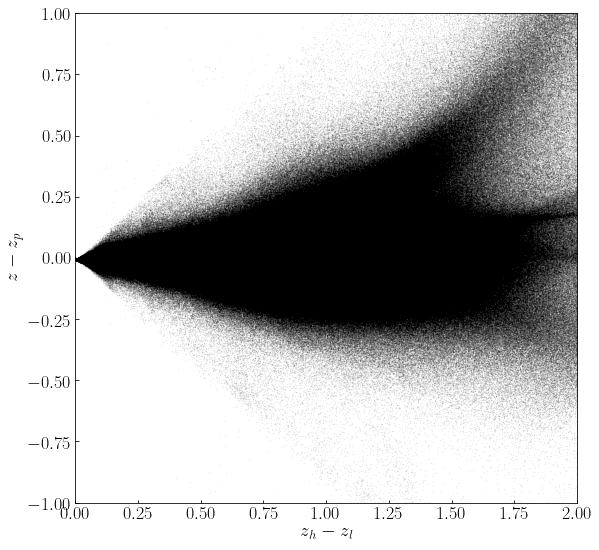

In [10]:
fig, axs = plt.subplots(1, 1, figsize = (9, 9))
plt.scatter(cat['Z_HIGH68']-cat['Z_LOW68'],cat['ZPHOT']-cat['Z_PEAK'],s=0.1,alpha=0.1,color='k')
plt.xlim([0,2])
plt.ylim([-1,1])
plt.xlabel('$z_h-z_l$',fontsize=19)
plt.ylabel('$z-z_p$',fontsize=19)

In [3]:
#####
cat_name = 'COSMOS_deep'
cat = Table.read('/Users/lejay/phosphorus_catalogs/p_cats_v211221/'+cat_name+'_pcat_211221_mags_gals.fits')

In [21]:
del cat

Text(0, 0.5, '$i_3-i$')

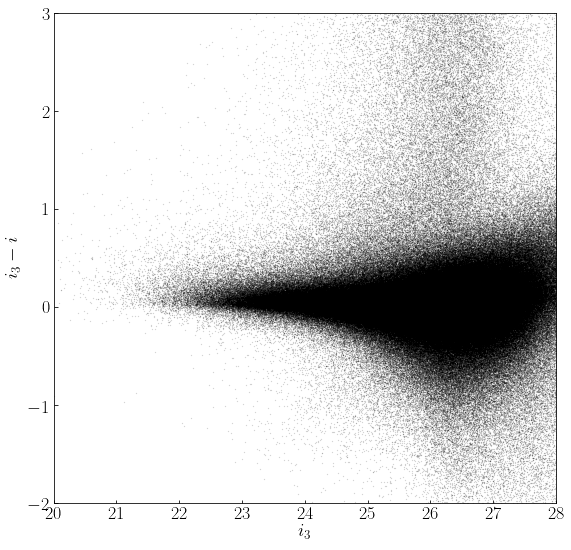

In [18]:
# cat_badphot = cat[cat['hasBadPhotometry_HSC-I']==1]

fig, axs = plt.subplots(1, 1, figsize = (9, 9))
plt.scatter(cat_badphot['i_aper3'],cat_badphot['i_aper3']-cat_badphot['i'],s=0.05,alpha=0.3,c='k')
plt.xlim([20,28])
plt.ylim([-2,3])
plt.xlabel('$i_3$',fontsize=19)
plt.ylabel('$i_3-i$',fontsize=19)

Text(0, 0.5, '$i_3-i$')

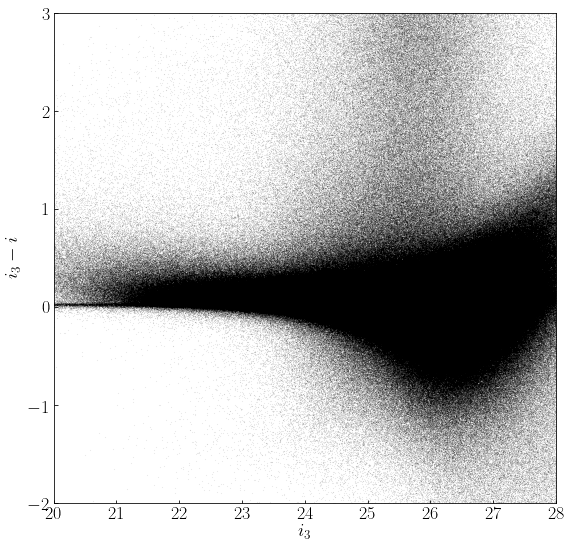

In [20]:
# cat_goodphot = cat[cat['hasBadPhotometry_HSC-I']==0]

fig, axs = plt.subplots(1, 1, figsize = (9, 9))
plt.scatter(cat_goodphot['i_aper3'],cat_goodphot['i_aper3']-cat_goodphot['i'],s=0.01,alpha=0.3,c='k')
plt.xlim([20,28])
plt.ylim([-2,3])
plt.xlabel('$i_3$',fontsize=19)
plt.ylabel('$i_3-i$',fontsize=19)

In [8]:
# auto mag vs aper mag (5 filters)

mag_offset_flags = np.ones(len(cat))
for band in ['g','r','i','z','y']:
    mag_offset_flag = (abs(cat[band+'_aper3']-cat[band])>1.5).astype(int)
    
    mag_offset_flags = np.vstack([mag_offset_flags,mag_offset_flag])
    
mag_offset_flags = np.delete(mag_offset_flags, (0), axis=0)
mag_offset_flagsum = np.sum(mag_offset_flags,axis=0)

(array([2261362.,       0.,  411212.,       0.,  136348.,       0.,
          52060.,       0.,   22846.,   75452.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

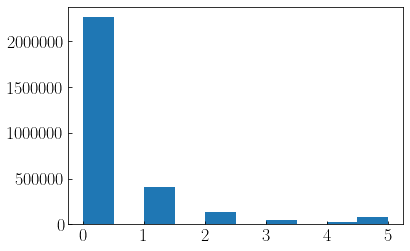

In [ ]:
plt.hist(mag_offset_flagsum)

(array([1351914.,       0.,   60242.,       0.,    8895.,       0.,
           5159.,       0.,    7808.,   72022.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

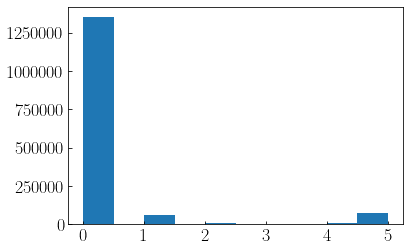

In [9]:
mag_offset_flagsum_1 = mag_offset_flagsum[cat['i']<26]
plt.hist(mag_offset_flagsum_1)